# 1 Задание
C помощью PANDAS создайте датафрейм из 10 млн. строк, содержащий 5 столбцов –
пол,
возраст,
доход,
образование,
профессия.
В
категориальных
образование и профессия сделайте 3-4 категории, в переменной пол – 2, возраст и доход
сделайте количественными, с типом INT. Для генерации этих столбцов используйте
методы NP.RANDOM.NORMAL, NP.RANDOM.CHOICE.

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
n = 10_000_000

decode_sex = pd.Series(data=np.array([0, 1], dtype=np.int8), index=['муж', 'жен'], name='sex_code')
decode_prof = pd.Series(data=np.array([0, 1, 2], dtype=np.int8), index=['уборщик', 'кассир', 'дворник'], name='prof_code')
decode_edu = pd.Series(data=np.array([0, 1, 2], dtype=np.int8), index=['школа','ПТУ','колледж'], name='edu_code')

df = pd.DataFrame({
    'sex': np.random.choice(decode_sex.to_numpy(), size = n),
    'age': np.random.normal(loc=35, scale=10, size = n).astype(int),
    'income': np.random.normal(loc=20000, scale=1500, size = n).astype(int),
    'education': np.random.choice(decode_edu.to_numpy(), size = n),
    'work': np.random.choice(decode_prof.to_numpy(), size = n)
})

# 2 Задание
Сохраните датафрейм в формате CSV, загрузите его в новый датафрейм и замерьте
скорость записи и чтения, с помощью библиотеки TIME.

In [ ]:
%%timeit
df.to_csv('data.csv', index=False)

15.3 s ± 382 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_df = pd.read_csv('data.csv')

3.21 s ± 523 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df.to_csv('data.csv')
new_df = pd.read_csv('data.csv')
new_df.info()

print()
file_size = os.path.getsize('data.csv')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column      Dtype
---  ------      -----
 0   Unnamed: 0  int64
 1   sex         int64
 2   age         int64
 3   income      int64
 4   education   int64
 5   work        int64
dtypes: int64(6)
memory usage: 457.8 MB

Размер файла: 218.2 МБ


# 3 Задание
Сохраните датафрейм в формате JSON, загрузите его в новый датафрейм и замерьте
скорость записи и чтения, с помощью библиотеки TIME.

In [ ]:
%%timeit
df.to_json('data.json', index=False)

15.7 s ± 2.44 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_df = pd.read_json('data.json')

1min 56s ± 6.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df.to_json('data.json')
new_df = pd.read_json('data.json')
new_df.info()

print()
file_size = os.path.getsize('data.json')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
Index: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column     Dtype
---  ------     -----
 0   sex        int64
 1   age        int64
 2   income     int64
 3   education  int64
 4   work       int64
dtypes: int64(5)
memory usage: 457.8 MB

Размер файла: 614.5 МБ


# 4 Задание
Сохраните датафрейм в формате PARQUET, загрузите его в новый датафрейм и
замерьте скорость записи и чтения, с помощью библиотеки TIME.

In [ ]:
%%timeit
df.to_parquet('data.parquet')

2.16 s ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_df = pd.read_parquet('data.parquet')

446 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df.to_parquet('data.parquet')
new_df = pd.read_parquet('data.parquet')
new_df.info()

print()
file_size = os.path.getsize('data.parquet')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column     Dtype
---  ------     -----
 0   sex        int8 
 1   age        int64
 2   income     int64
 3   education  int8 
 4   work       int8 
dtypes: int64(2), int8(3)
memory usage: 181.2 MB

Размер файла: 31.5 МБ


# 5 Задание
Сохраните датафрейм в формате ORC, загрузите его в новый датафрейм и замерьте
скорость записи и чтения, с помощью библиотеки TIME.

In [ ]:
%%timeit
df.to_orc('data.orc',index='records')

2.71 s ± 557 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_df = pd.read_orc('data.orc')

972 ms ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
records = df.to_orc('data.orc',index='records')
new_df = pd.read_orc('data.orc')
new_df.info()

print()
file_size = os.path.getsize('data.orc')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column             Dtype
---  ------             -----
 0   sex                int8 
 1   age                int64
 2   income             int64
 3   education          int8 
 4   work               int8 
 5   __index_level_0__  int64
dtypes: int64(3), int8(3)
memory usage: 257.5 MB

Размер файла: 55.2 МБ


# 6 Задание
Сохраните датафрейм в формате FEATHER, загрузите его в новый датафрейм и
замерьте скорость записи и чтения, с помощью библиотеки time.

In [ ]:
import pyarrow.feather as feather

In [ ]:
%%timeit
feather.write_feather(df, 'data.feather')

The slowest run took 4.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1.26 s ± 994 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_df = feather.read_feather('data.feather')

386 ms ± 77.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
feather.write_feather(df, 'data.feather')
new_df = feather.read_feather('data.feather')
new_df.info()

print()
file_size = os.path.getsize('data.feather')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column     Dtype
---  ------     -----
 0   sex        int8 
 1   age        int64
 2   income     int64
 3   education  int8 
 4   work       int8 
dtypes: int64(2), int8(3)
memory usage: 181.2 MB

Размер файла: 81.5 МБ


# 7 Задание
Сохраните датафрейм в формате AVRO, загрузите его в новый датафрейм и замерьте
скорость записи и чтения, с помощью библиотеки time.

In [ ]:
!pip install fastavro
from fastavro import writer, parse_schema, reader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.6 MB/s eta 0:00:00


In [ ]:
schema = {'name': 'df',
          'type': 'record',
          'fields': [{'name': 'sex', 'type': 'int'},
                     {'name': 'age', 'type': 'int'},
                     {'name': 'income', 'type': 'int'},
                     {'name': 'education', 'type': 'int'},
                     {'name': 'work', 'type': 'int'}]}

records = df.to_dict(orient='records')

In [ ]:
%%timeit
with open('data.avro', 'wb') as out_file:
    writer(out_file, schema, records)

44.3 s ± 5.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
avro_records = []

with open('data.avro', 'rb') as fo:
  avro_reader = reader(fo)
  for record in avro_reader:
    avro_records.append(record)

33.1 s ± 5.82 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
with open('data.avro', 'wb') as out_file:
    writer(out_file, schema, records)

avro_records = []

with open('data.avro', 'rb') as fo:
  avro_reader = reader(fo)
  for record in avro_reader:
    avro_records.append(record)

In [ ]:
new_df = pd.DataFrame(data = avro_records)

In [ ]:
new_df.info()

print()
file_size = os.path.getsize('data.avro')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column     Dtype
---  ------     -----
 0   sex        int64
 1   age        int64
 2   income     int64
 3   education  int64
 4   work       int64
dtypes: int64(5)
memory usage: 381.5 MB

Размер файла: 66.9 МБ


#8 Задание
Замерьте объем памяти файлов на диске c помощью библиотеки OS, объем датафреймов
в памяти с помощью методов SYS,GETSIZEOF() или DF.INFO(), и заполните таблицу
(можно создать в excel, и скопировать в текстовую ячейку ноутбука, либо создать html
код, с таблицей) этими значениями, а также значениями скоростей для каждого формата.

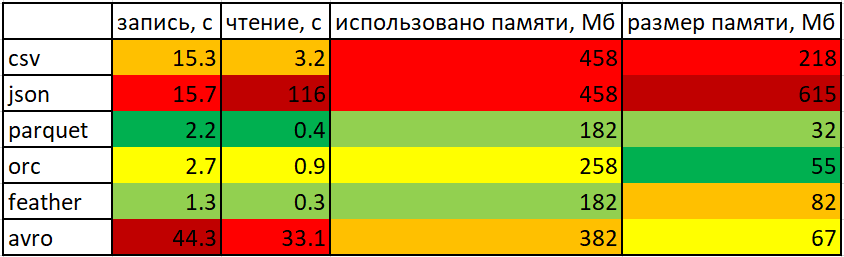

Для выполнения следующих заданий на основании таблицы выбраны форматы parquet и feather

# 9 Задание
На основании таблицы выберите способ для максимально быстрого сохранения на диск
для датафрейма, той же структуры, что и в п.1, но из 100 млн. строк. Здесь необходимо
сохранить датафрейм и замерить время выполнения этой операции.

In [ ]:
import pandas as pd
import numpy as np
import os

n = 100_000_000

decode_sex = pd.Series(data=np.array([1, 2], dtype=np.int8), index=['муж', 'жен'], name='sex_code')
decode_prof = pd.Series(data=np.array([1, 2, 3], dtype=np.int8), index=['уборщик', 'кассир', 'дворник'], name='prof_code')
decode_edu = pd.Series(data=np.array([1, 2, 3], dtype=np.int8), index=['школа','ПТУ','колледж'], name='edu_code')

dfB = pd.DataFrame({
    'sex': np.random.choice(decode_sex.to_numpy(), size = n),
    'age': np.random.normal(loc=35, scale=10, size = n).astype(int),
    'income': np.random.normal(loc=20000, scale=1500, size = n).astype(int),
    'education': np.random.choice(decode_edu.to_numpy(), size = n),
    'work': np.random.choice(decode_prof.to_numpy(), size = n)
})

In [ ]:
%%timeit
dfB.to_parquet('dataBIG.parquet')

19.5 s ± 2.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_dfB = pd.read_parquet('dataBIG.parquet')

5.19 s ± 1.84 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
dfB.to_parquet('dataBIG.parquet')
new_dfB = pd.read_parquet('dataBIG.parquet')
new_dfB.info()

print()
file_size = os.path.getsize('dataBIG.parquet')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000000 entries, 0 to 99999999
Data columns (total 5 columns):
 #   Column     Dtype
---  ------     -----
 0   sex        int8 
 1   age        int64
 2   income     int64
 3   education  int8 
 4   work       int8 
dtypes: int64(2), int8(3)
memory usage: 1.8 GB

Размер файла: 315.1 МБ


In [ ]:
import pyarrow.feather as feather

In [ ]:
%%timeit
feather.write_feather(dfB, 'dataBIG.feather')

13.1 s ± 1.71 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
new_dfB = feather.read_feather('dataBIG.feather')

7.89 s ± 3.21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
feather.write_feather(dfB, 'dataBIG.feather')
new_dfB = feather.read_feather('dataBIG.feather')
new_dfB.info()

print()
file_size = os.path.getsize('dataBIG.feather')
print(f'Размер файла: {round(file_size/(1024**2),1)} МБ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000000 entries, 0 to 99999999
Data columns (total 5 columns):
 #   Column     Dtype
---  ------     -----
 0   sex        int8 
 1   age        int64
 2   income     int64
 3   education  int8 
 4   work       int8 
dtypes: int64(2), int8(3)
memory usage: 1.8 GB

Размер файла: 815.4 МБ


Формат для самого быстрого сохранения данных да диск из исследуемых это feather

# 10 Задание
На основании таблицы выберите способ для максимально быстрой агрегации данных из
датафрейма на диске, той же структуры, что и в п.1, но из 100 млн. строк. В качестве
агреграции надо рассчитать средний возраст, медианный доход, самый частый пол,
самый редкий тип образования, профессию, с максимальной зп. Здесь необходимо и
сохранить, и считать и обработать этот датафрейм, и замерить время выполнения этих
операций.

In [ ]:
import pandas as pd
import numpy as np
import os
import time

start_time = time.time()

n = 100_000_000

decode_sex = pd.Series(data=np.array([1, 2], dtype=np.int8), index=['муж', 'жен'], name='sex_code')
decode_prof = pd.Series(data=np.array([1, 2, 3], dtype=np.int8), index=['уборщик', 'кассир', 'дворник'], name='prof_code')
decode_edu = pd.Series(data=np.array([1, 2, 3], dtype=np.int8), index=['школа','ПТУ','колледж'], name='edu_code')

df = pd.DataFrame({
    'gender': np.random.choice(decode_sex.to_numpy(), size = n),
    'age': np.random.normal(loc=35, scale=10, size = n).astype(int),
    'salary': np.random.normal(loc=20000, scale=1500, size = n).astype(int),
    'education': np.random.choice(decode_edu.to_numpy(), size = n),
    'profession': np.random.choice(decode_prof.to_numpy(), size = n)
})

df.to_parquet('dataBIG.parquet')
curr_time = time.time()

In [ ]:
start_time1 = time.time()

def decode(column, mapping):
    return column.map(mapping)

new_df = pd.read_parquet('dataBIG.parquet')

gender_mapping = {0: 'муж', 1: 'жен'}
education_mapping = {0: 'школа', 1: 'колледж', 2: 'ПТУ'}
profession_mapping = {0: 'кассир', 1: 'дворник', 2: 'няня'}

new_df['gender_decoded'] = decode(new_df['gender'], gender_mapping)
new_df['education_decoded'] = decode(new_df['education'], education_mapping)
new_df['profession_decoded'] = decode(new_df['profession'], profession_mapping)

average_age = new_df['age'].mean()
median_salary = new_df['salary'].median()
most_common_gender = new_df['gender_decoded'].mode()[0]
rarest_education = new_df['education_decoded'].value_counts().idxmin()
profession_max_salary = new_df.loc[new_df['salary'].idxmax(), 'profession_decoded']

print(f"Средний возраст: {average_age}")
print(f"Медианный доход: {median_salary}")
print(f"Самый частый пол: {most_common_gender}")
print(f"Самый редкий тип образования: {rarest_education}")
print(f"Профессия с максимальной зарплатой: {profession_max_salary}")

curr_time1 = time.time()
print("Время выполнения", round((curr_time - start_time) + (curr_time1 - start_time1),1), 'секунд')

Средний возраст: 34.49964717
Медианный доход: 20000.0
Самый частый пол: жен
Самый редкий тип образования: колледж
Профессия с максимальной зарплатой: няня
Время выполнения 84.7 секунд
